In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from time import perf_counter_ns

from unbalancedsinkhorn import DebiasedUOT

# My python classes for loops we've defined so far
from utils import (normal_pdf, 
                   jet_profile_initialisation,
                     Sinkhorn_Divergence_balanced, 
                     compute_norms_and_plot, 
                     plot_nest_heights,
                     merged_plots,
                     compute_heights_distance,
                     compute_sigma_distance)

In [2]:
! ls pickle_folder/ | grep -E "nest" | sort -V

nest_001_heights_T0.pkl
nest_001_heights_T5.pkl
nest_001_heights_nighbouting_T0.pkl
nest_001_heights_nighbouting_T5.pkl
nest_001_heights_nighbouting_T10.pkl
nest_001_sigma_T0.pkl
nest_001_sigma_T5.pkl
nest_001_sigma_neigh_T0.pkl
nest_001_sigma_neigh_T5.pkl
nest_001_sigma_neigh_T10.pkl
nest_heights_T0.pkl
nest_heights_T5.pkl
nest_heights_T10.pkl
nest_heights_nighbouting_T0.pkl
nest_heights_nighbouting_T5.pkl
nest_heights_nighbouting_T10.pkl
nest_sigma_T0.pkl
nest_sigma_T5.pkl
nest_sigma_T10.pkl
nest_sigma_neigh_T0.pkl
nest_sigma_neigh_T5.pkl
nest_sigma_neigh_T10.pkl


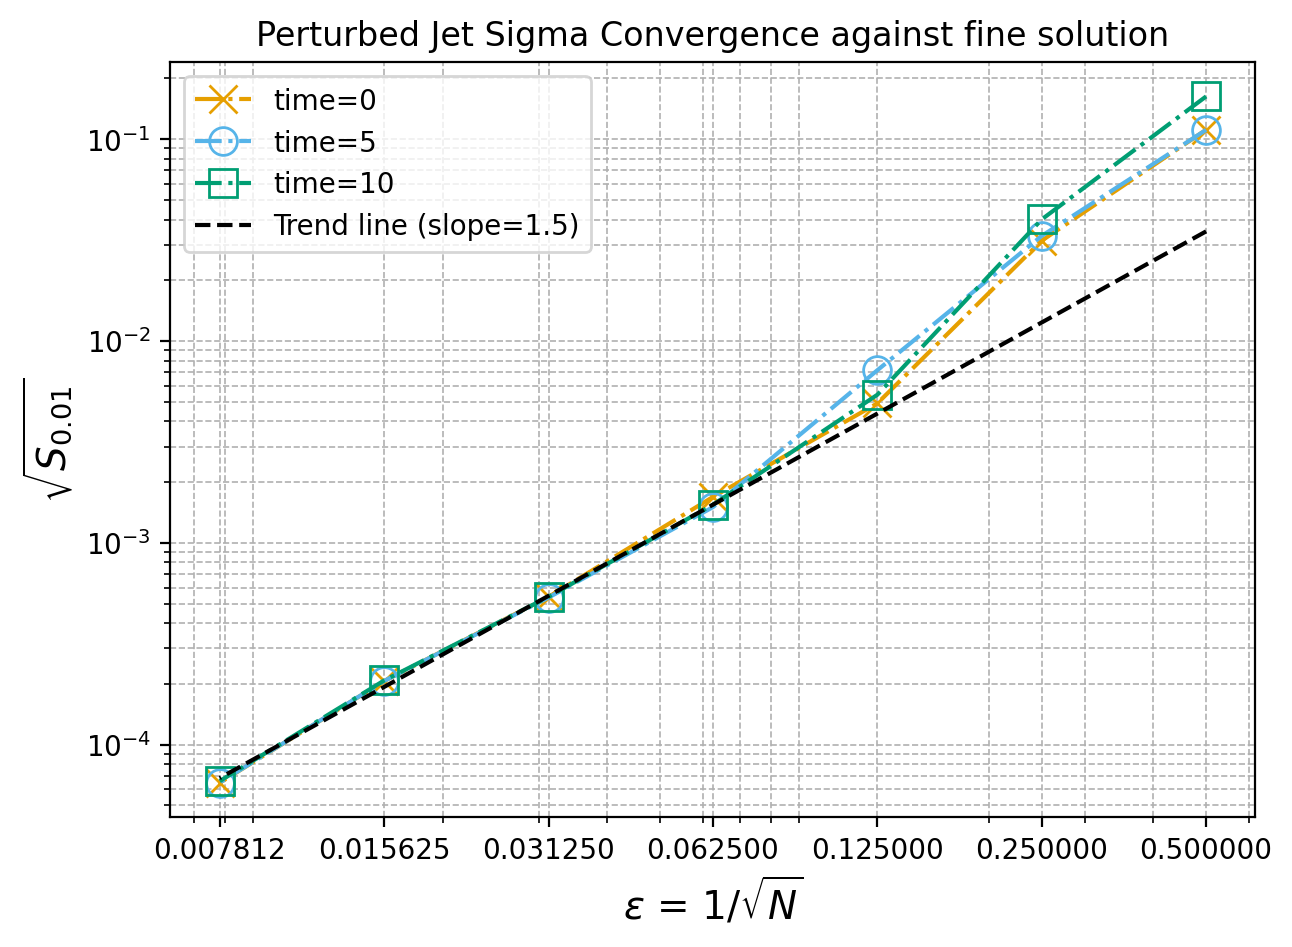

In [3]:

plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against fine solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='nest_heights',
    Times=['T0', 'T5', 'T10'], # 'T0', 
    save_filename='test.pdf',   #'pertjet_nest_sigma_against_finesolution.png',
    slope=1.5
)



[-2.79984174e-10]


/home/jacob/SWSG_repo/dynamic_jet_study/utils.py:453: RuntimeWarning: invalid value encountered in sqrt
  sqrt_s = np.sqrt(s_)


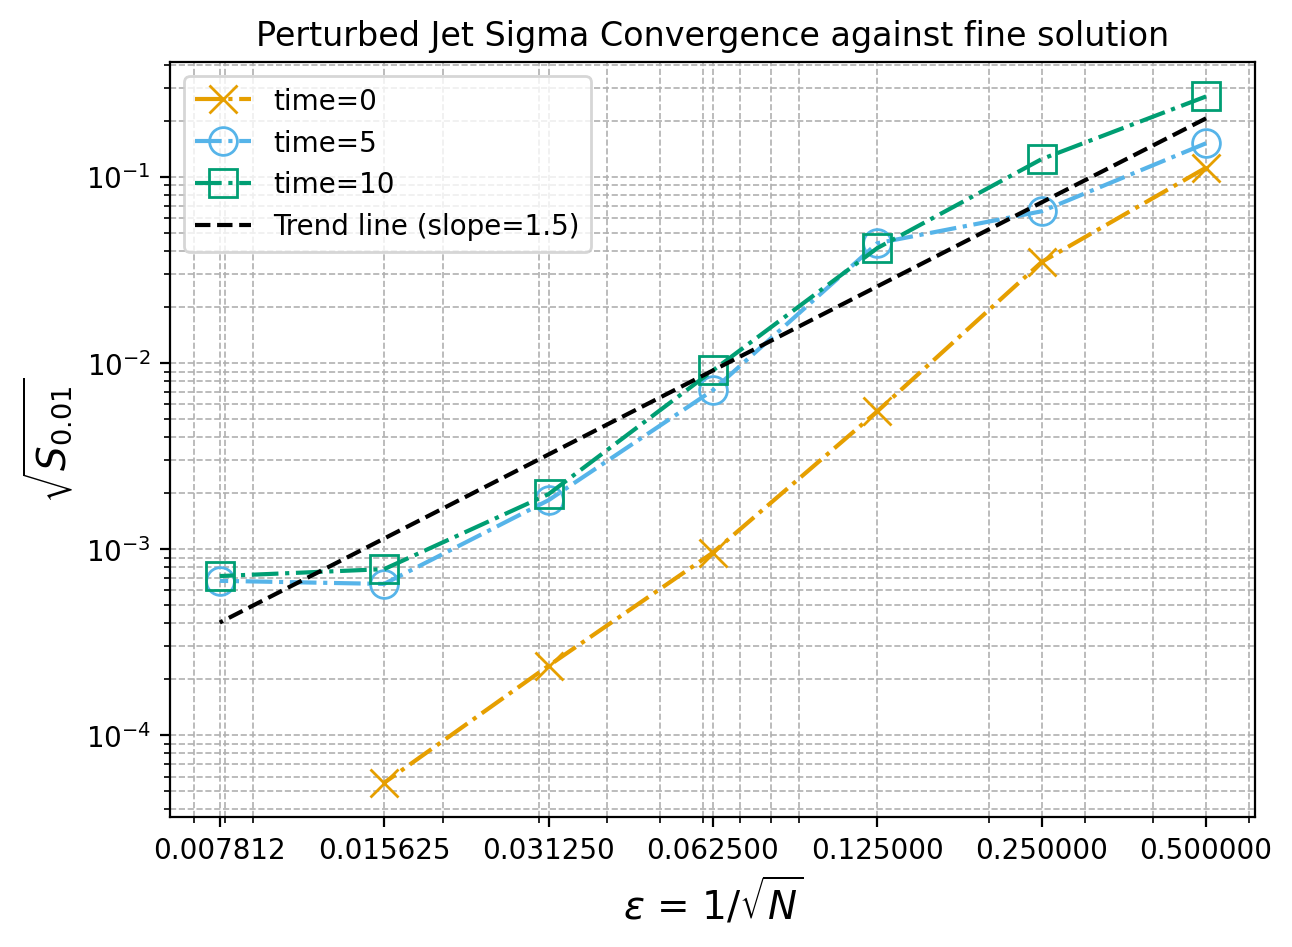

In [4]:

plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against fine solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='nest_sigma',
    Times=['T0', 'T5', 'T10'], # 'T0', 
    save_filename='test.pdf',   #'pertjet_nest_sigma_against_finesolution.png',
    slope=1.5
)


In [5]:
# somthing strange has gone wrong with the last sigma value lets have a look;
t = compute_sigma_distance(
    device='cuda:0',
    time=0,
    epsilons=[0.015625/2],
    prefix='nest_sigma_test7812',
    T='T0',
)

FileNotFoundError: [Errno 2] No such file or directory: 'data_store/OT_heun_0.05_0.0078125_strength_0.0001.pkl'

In [5]:


# plot_nest_heights(
#     title='Perturbed Jet Sigma Convergence against fine solution',
#     epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
#     file_prefix='nest_sigma',
#     Times=['T5', 'T10'], # 'T0', 
#     save_filename='pertjet_nest_sigma_against_finesolution.png',
#     slope=1.5
# )


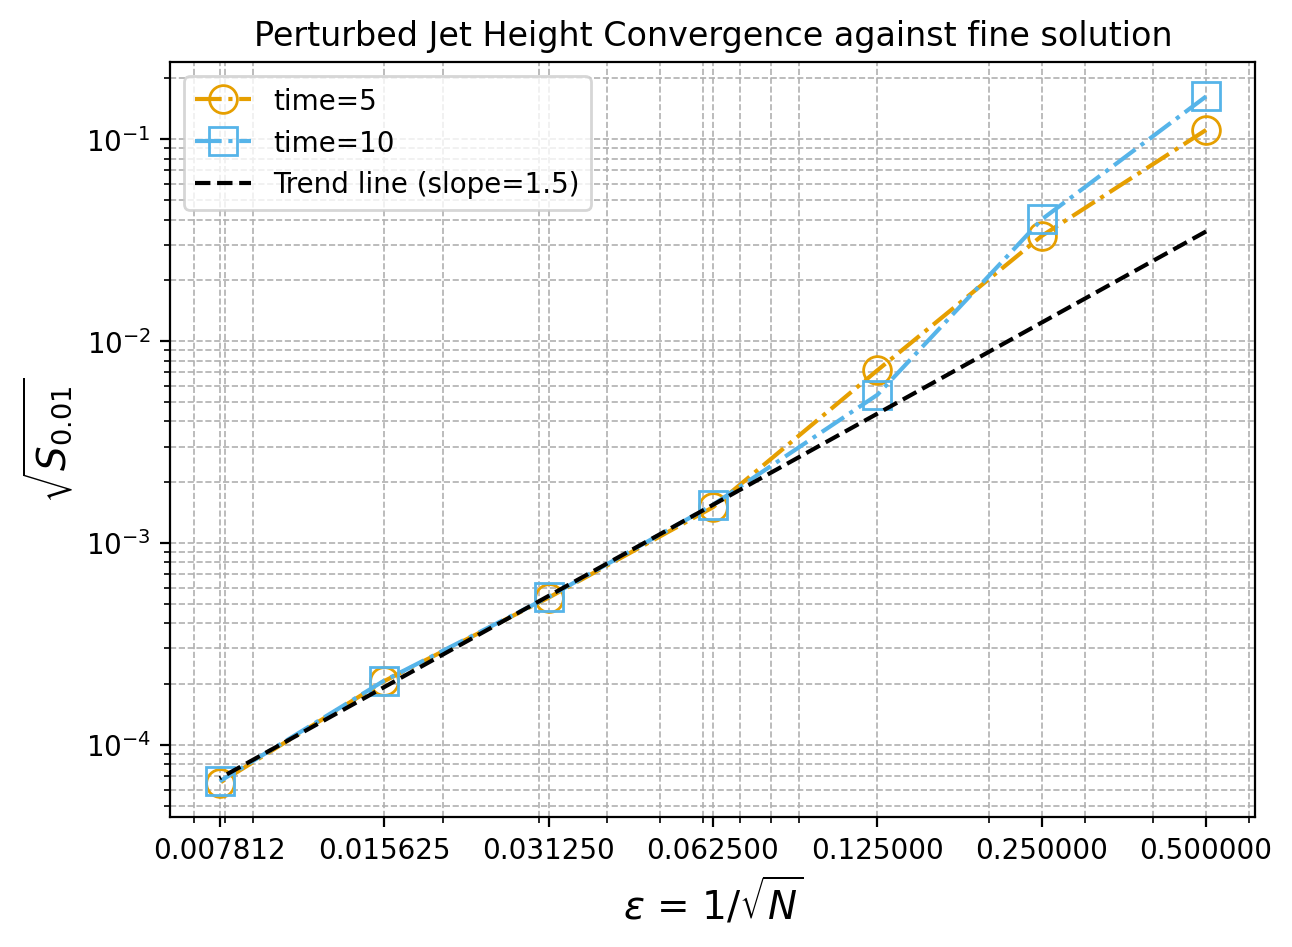

In [6]:
plot_nest_heights(
    title='Perturbed Jet Height Convergence against fine solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='nest_heights',
    Times=['T5', 'T10'], # 'T0', 
    save_filename='pertjet_nest_height_against_finesolution.png',
    slope=1.5
)


In [ ]:
s = plot_nest_heights(
    title='Perturbed Jet Height Convergence against neighbouring solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='ot_approx_heights',
    Times=['T0', 'T5', 'T10'], # 'T0', 
    save_filename='ot_pertjet_nest_height_against_finest.png',
    slope=1.5,
    return_s=True
)

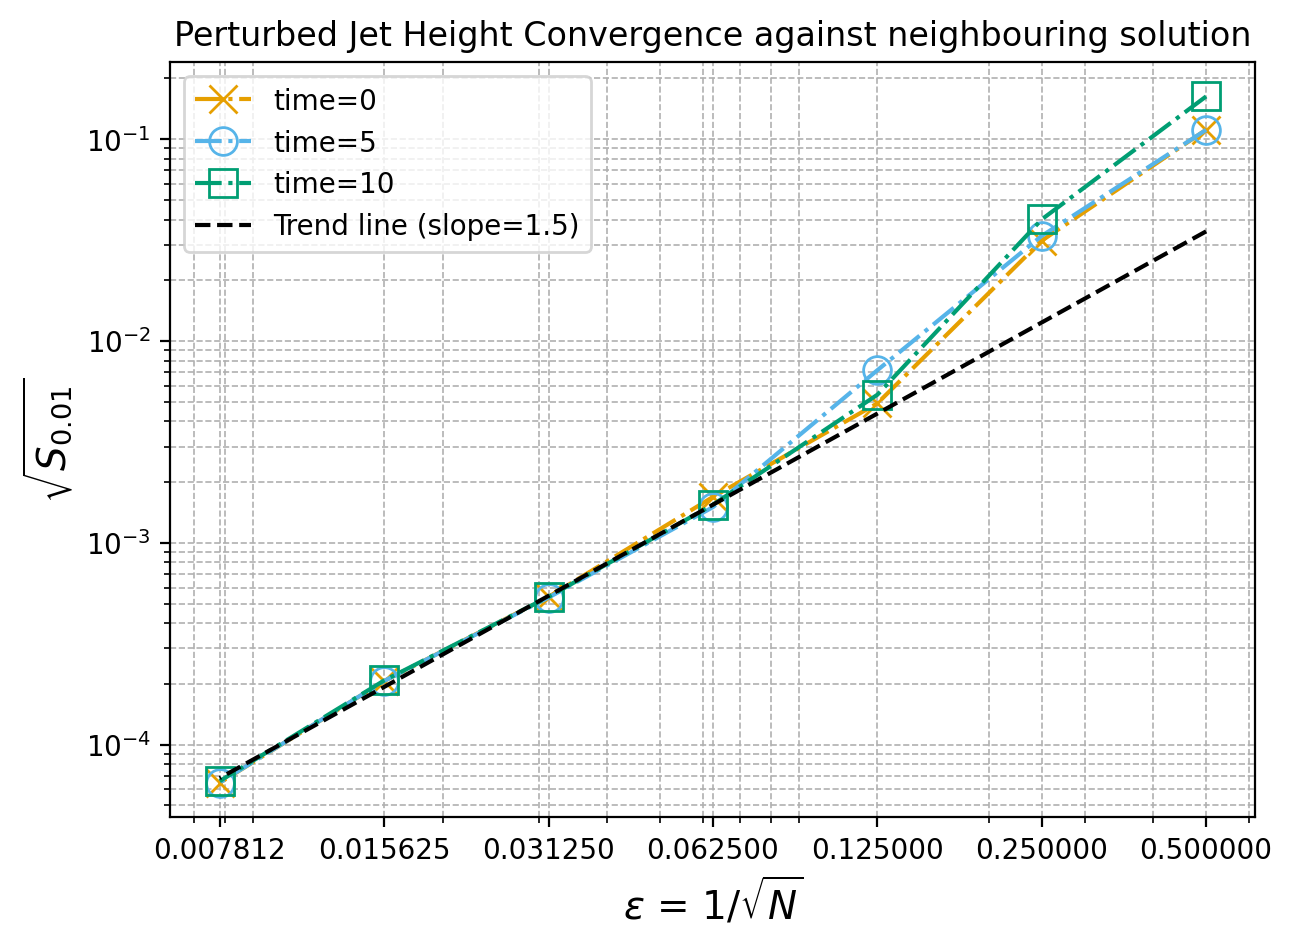

In [16]:
s = plot_nest_heights(
    title='Perturbed Jet Height Convergence against neighbouring solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='nest_heights',
    Times=['T0', 'T5', 'T10'], # 'T0', 
    save_filename='pertjet_nest_height_against_nghb.png',
    slope=1.5,
    return_s=True
)

[-2.79984174e-10]


/home/jacob/SWSG_repo/dynamic_jet_study/utils.py:534: RuntimeWarning: invalid value encountered in sqrt
  sqrt_s = np.sqrt(s_)


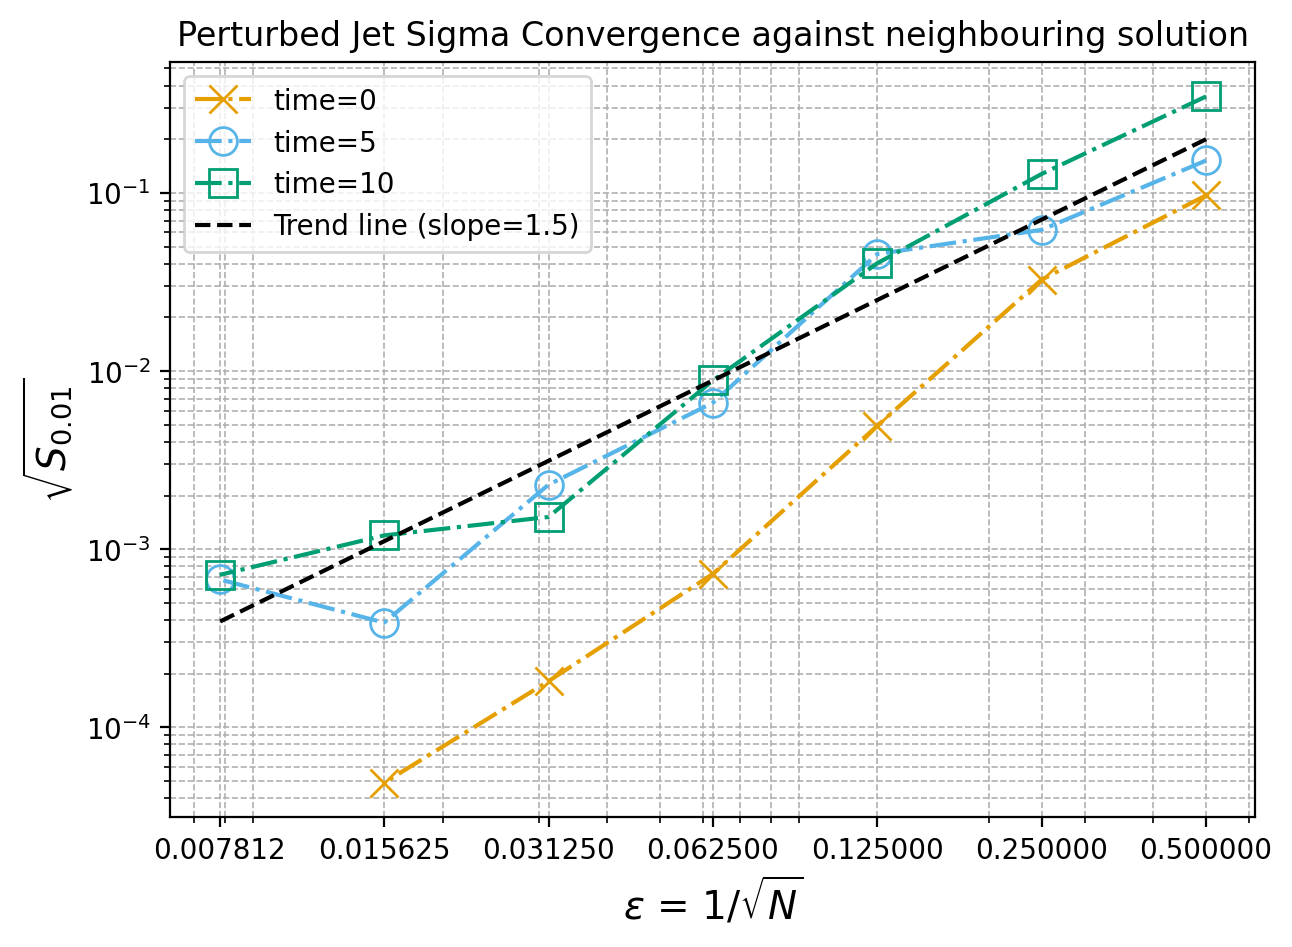

In [8]:


s = plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against neighbouring solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='nest_sigma_neigh',
    Times=['T0', 'T5', 'T10'], # 'T0',
    save_filename='pertjet_nest_sigma_against_ngbh.png',
    slope=1.5,
    return_s=True
)


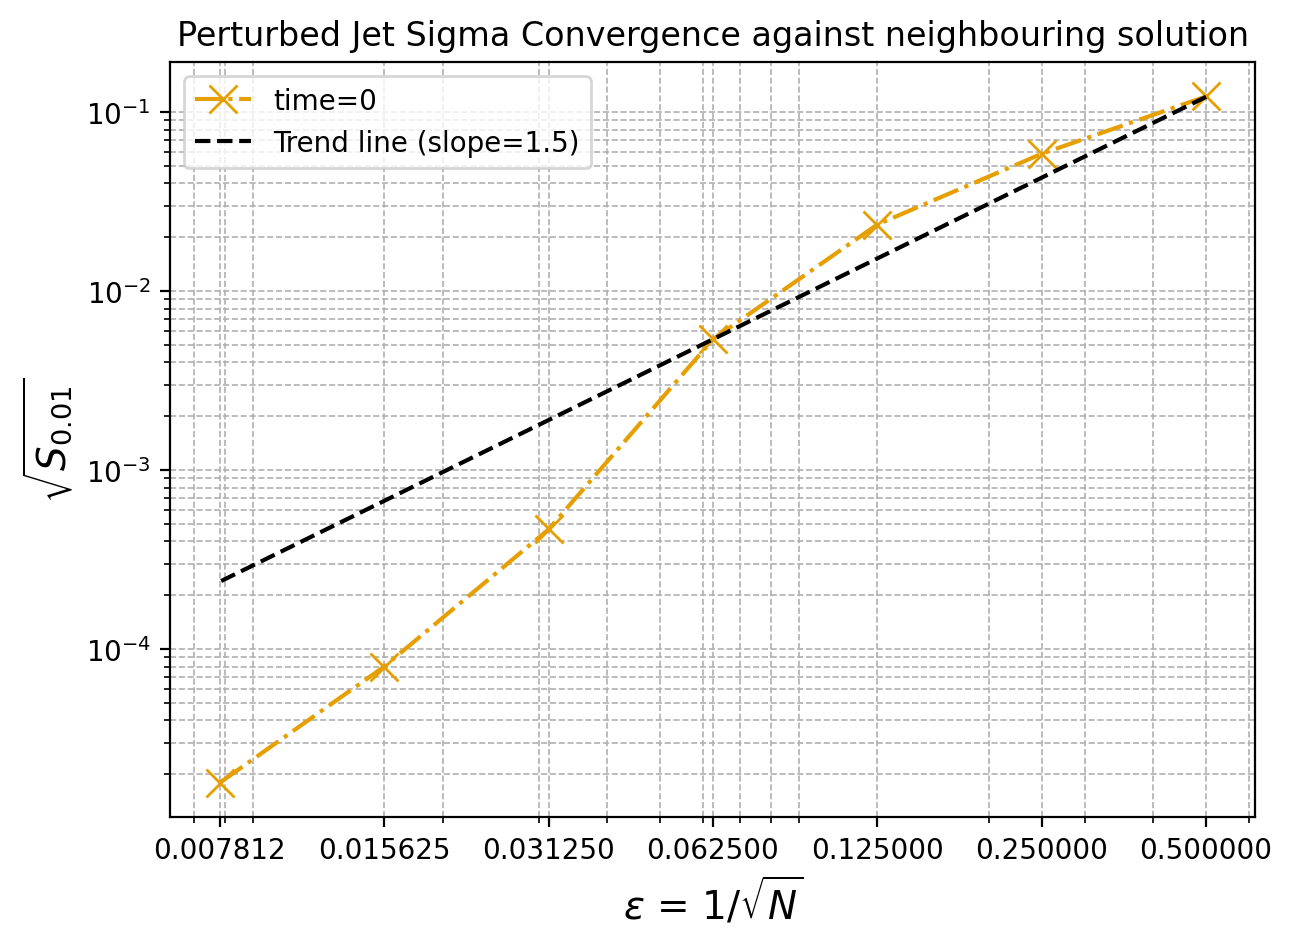

{'T0': [0.015017190811292137,
  0.003435366843436455,
  0.0005557538719696047,
  2.902570853552562e-05,
  2.1792980707574662e-07,
  6.378722279048723e-09,
  3.2124473692625034e-10]}

In [9]:
plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against neighbouring solution',
    epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2],
    file_prefix='ot_',
    Times=['T0'], # 'T0',
    save_filename='test.png',
    slope=1.5,
    return_s=True
)


In [10]:
[ (1/25) * np.sqrt(2)**(-i) for i in range(6)]

[0.04,
 0.028284271247461898,
 0.019999999999999997,
 0.014142135623730947,
 0.009999999999999998,
 0.007071067811865473]

NameError: name 's1' is not defined

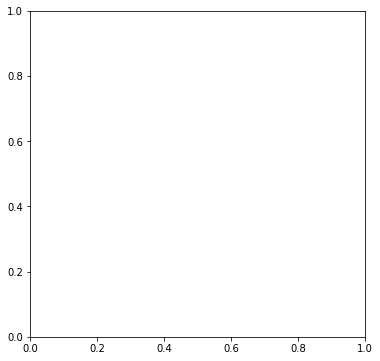

In [11]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)
ax.loglog([ (1/25) * np.sqrt(2)**(-i) for i in range(6)], s1['T5'], '.', label='finer')
ax.loglog([0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2], s['T5'], '.--', label='nest')

## Finer solution runs

In [ ]:
! ls pickle_folder/

finer_full_heights_T0.pkl	  nest_heights_nighbouting_T10.pkl
finer_full_heights_T5.pkl	  nest_heights_nighbouting_T5.pkl
finer_full_sigma_T0.pkl		  nest_sigma_T0.pkl
finer_full_sigma_T5.pkl		  nest_sigma_T10.pkl
finerheights_nighbouting_T0.pkl   nest_sigma_T5.pkl
finerheights_nighbouting_T5.pkl   nest_sigma_neigh_T0.pkl
finersigma_neigh_T0.pkl		  nest_sigma_neigh_T10.pkl
finersigma_neigh_T10.pkl	  nest_sigma_neigh_T5.pkl
finersigma_neigh_T5.pkl		  saving_sigmashorter_T25.pkl
heights0.001_nighbouting_T10.pkl  saving_sigmashorter_T5.pkl
heights_nighbouting_T5.pkl	  shorter_heights.pkl
nest_heights_T0.pkl		  shorter_heights_T25.pkl
nest_heights_T10.pkl		  sigma0.001_neigh_T10.pkl
nest_heights_T5.pkl		  sigma_neighbout_T5.pkl
nest_heights_nighbouting_T0.pkl


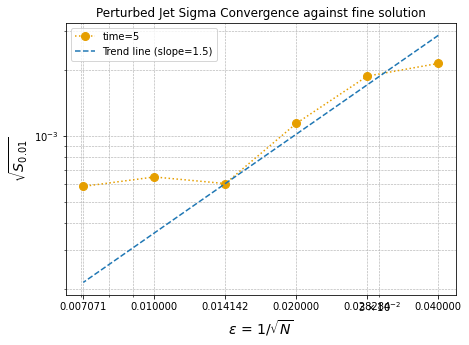

In [ ]:
s1 = plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against fine solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(6)],
    file_prefix='finer_full_sigma',
    Times=['T5'], # 'T0', 
    save_filename='nest_height_ngbh.png',
    slope=1.5,
    return_s=True
)


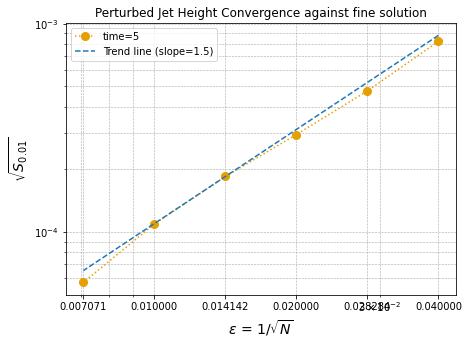

In [ ]:
plot_nest_heights(
    title='Perturbed Jet Height Convergence against fine solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(6)],
    file_prefix='finer_full_heights',
    Times=['T5'], # 'T0', 
    save_filename='nest_height_ngbh.png',
    slope=1.5
)


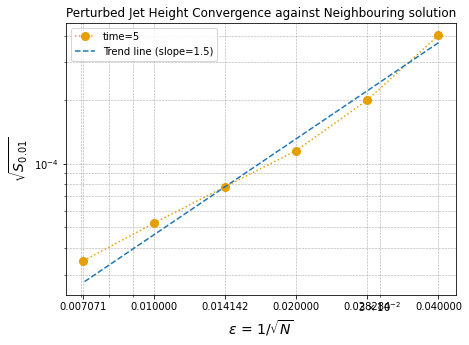

In [ ]:
plot_nest_heights(
    title='Perturbed Jet Height Convergence against Neighbouring solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(6)],
    file_prefix='finerheights_nighbouting',
    Times=[ 'T5'], #'T0',
    save_filename='nest_height_ngbh.png',
    slope=1.5
)


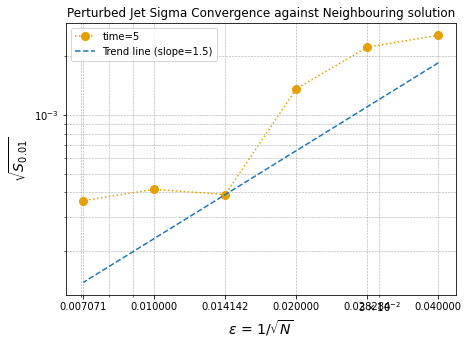

In [ ]:
plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against Neighbouring solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(6)],
    file_prefix='finersigma_neigh',
    Times=['T5'], # 'T0', 
    save_filename='nest_height_ngbh.png',
    slope=1.5
)


[-1.68061211e-10]


/tmp/ipykernel_17812/3554431419.py:27: RuntimeWarning: invalid value encountered in sqrt
  sqrt_s = np.sqrt(s_)


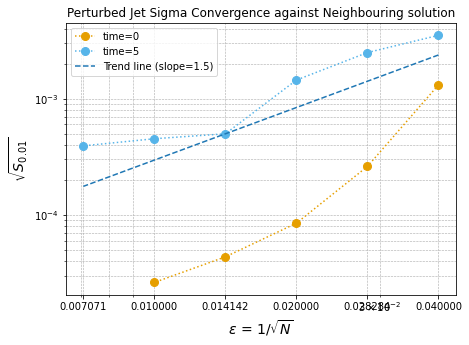

In [ ]:
plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against Neighbouring solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(6)],
    file_prefix='finer001_sigma_neigh',
    Times=['T0', 'T5'], # 'T0', 
    save_filename='test.png',
    slope=1.5
)


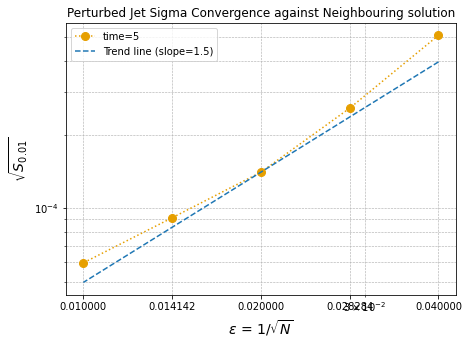

{'T5': [2.6046508513899447e-07,
  6.591825630307413e-08,
  1.9727153465452785e-08,
  8.345618082890305e-09,
  3.5674388504033927e-09]}

In [ ]:
plot_nest_heights(
    title='Perturbed Jet Sigma Convergence against Neighbouring solution',
    epsilons=[ (1/25) * np.sqrt(2)**(-i) for i in range(5)],
    file_prefix='finer001_heights_nighbouting',
    Times=[ 'T5'], # 'T0', 
    save_filename='test.png',
    slope=1.5,
    return_s=True
)


# Merged plots

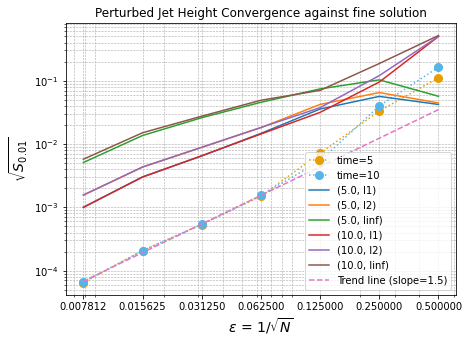

In [ ]:
# # inputs
# title='Perturbed Jet Height Convergence against fine solution'
# epsilons=[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625/2]
# file_prefix='nest_heights'
# Times=['T5', 'T10'] 
# save_filename='pertjet_all_height_against_finesolution.png'
# slope=1.5

# # function 
# s = {}

# # Load data for different time steps
# for T in Times:
#     with open(f'pickle_folder/{file_prefix}_{T}.pkl', 'rb') as f:
#         # only one list
#         s[T] = pickle.load(f)

# plt.figure(figsize=(7, 5))
# colours = ["#E69F00", "#56B4E9", "#009E73"]

# # Plot each dataset
# for i, key in enumerate(s.keys()):
#     s_ = np.array(s[key])
#     if any([k < 0 for k in s_]):
#         print(s_[s_<0])
#     sqrt_s = np.sqrt(s_)
#     plt.loglog(epsilons, sqrt_s, 'o:', color=colours[i], label='time='+key.split('T')[1], markersize=8)


# for i, key in enumerate(['99', '199']):
#     with open(f'pickle_folder/nn_height_heun_0.05_{key}.pkl', 'rb') as f:
#         lp_norm = pickle.load(f)
    
#     # threee keys; l1, l2, linf
#     for j, key2 in enumerate(lp_norm.keys()):
#         plt.loglog(epsilons, lp_norm[key2], label=f'({(int(key)+1)*0.05}, {key2})', markersize=8)

#     # print(lp_norm)

# # Define trend line with slope 1
# ref_index = len(epsilons) // 2  # Use middle epsilon as reference
# C = sqrt_s[ref_index] / epsilons[ref_index]**slope  # Compute scaling factor
# trend_line = C * np.array(epsilons)**slope
# plt.loglog(epsilons, trend_line, '--', label=f'Trend line (slope={slope})')

# plt.xticks(epsilons, [f"{eps:.6f}" for eps in epsilons])

# # Labels and formatting
# plt.title(title)
# plt.xlabel(r'$\varepsilon$ = 1/$\sqrt{N}$', fontsize=14)
# plt.ylabel(r'$\sqrt{S_{0.01}}$', fontsize=14)
# plt.legend()
# plt.grid(True, which="both", linestyle="--", linewidth=0.6)

# # Save plot
# plt.savefig(save_filename)
# plt.show()

merged_plots()
